In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('cdfs\cdfs.v1.6.11.cat', names=True, dtype=None, encoding='ascii')

In [3]:
data['id'] # I need to use the id column to make sure that all of the data is matched up whem plotting different IRAC fluxes,
# Essentially going to need to filter out all of the neg values (or take the magnitude) and then make sure that
# I have a correct value based on ID



array([    1,     2,     3, ..., 30909, 30910, 30911])

In [315]:
# We want to now want to get rid of any rows that have a flux of 0 or below
# and also make sure that the final set of data is just the same as the
# each other for each IRAC dataset
# Also the use parameter must be equal to 1
data = data[(data['f_IRAC_36'] > 0) & (data['f_IRAC_45'] > 0) & (data['f_IRAC_58'] > 0) & (data['f_IRAC_80'] > 0) & (data['use'] == 1)]




# Count how many rows are left for each flux measurement

print('Number of rows left for IRAC 3.6um: ', len(data['f_IRAC_36']))
print('Number of rows left for IRAC 4.5um: ', len(data['f_IRAC_45']))
print('Number of rows left for IRAC 5.8um: ', len(data['f_IRAC_58']))
print('Number of rows left for IRAC 8.0um: ', len(data['f_IRAC_80']))

# As they all match we can now visualise the dataset for each and see how the fluxes are different




Number of rows left for IRAC 3.6um:  7991
Number of rows left for IRAC 4.5um:  7991
Number of rows left for IRAC 5.8um:  7991
Number of rows left for IRAC 8.0um:  7991


Text(0, 0.5, 'Flux (uJy)')

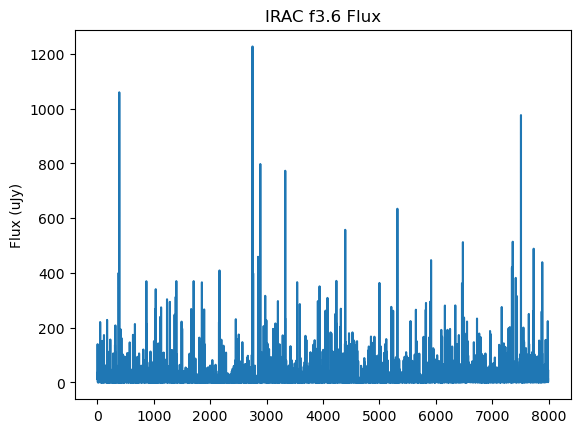

In [316]:
plt.plot(data['f_IRAC_36'])
plt.title('IRAC f3.6 Flux')
plt.xlabel('')
plt.ylabel('Flux (uJy)')

Text(0, 0.5, 'Flux (uJy)')

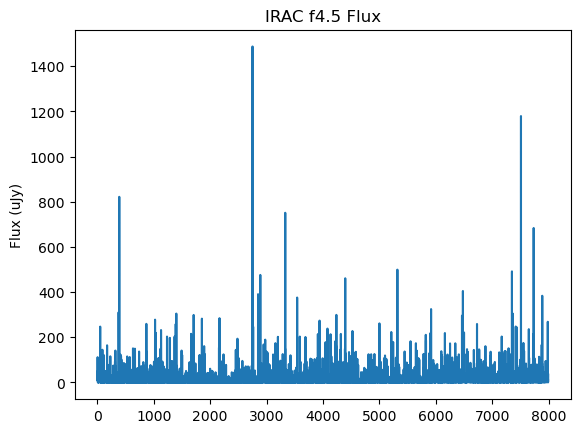

In [317]:
plt.plot(data['f_IRAC_45'])
plt.title('IRAC f4.5 Flux')
plt.xlabel('')
plt.ylabel('Flux (uJy)')

Text(0, 0.5, 'Flux (uJy)')

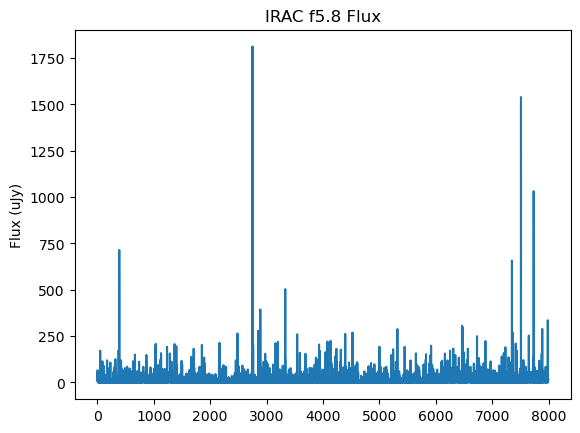

In [318]:
plt.plot(data['f_IRAC_58'])
plt.title('IRAC f5.8 Flux')
plt.xlabel('')
plt.ylabel('Flux (uJy)')


Text(0, 0.5, 'Flux (uJy)')

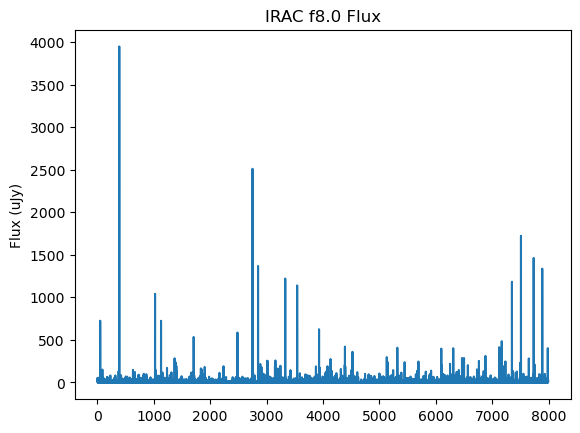

In [319]:
plt.plot(data['f_IRAC_80'])
plt.title('IRAC f8.0 Flux')
plt.xlabel('')
plt.ylabel('Flux (uJy)')

In [320]:
# Now that we can see this we see a very particular trend for some of the high flux data points
# What we want to do is attempt to plot these in a particular way to see if we can see a trend
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.spatial import ConvexHull



## The Lacy Wedge
The code below aims to select a subset of the dataset that corresponds to known agn, this is defined within the selection criteria in the literature (Lacy et al. 2004, 2007; Sajina et al. 2012).

The criteria are as follows:

$log_{10}(f_{5.8}/f_{3.6}) > -0.1$ 

$log_{10}(f_{8.0}/f_{4.5}) > -0.2$

$log_{10}(f_{8.0}/f_{4.5}) < 0.8 \times log_{10}(f_{5.8}/f_{3.6}) + 0.5$


Number of selected sources: 2454


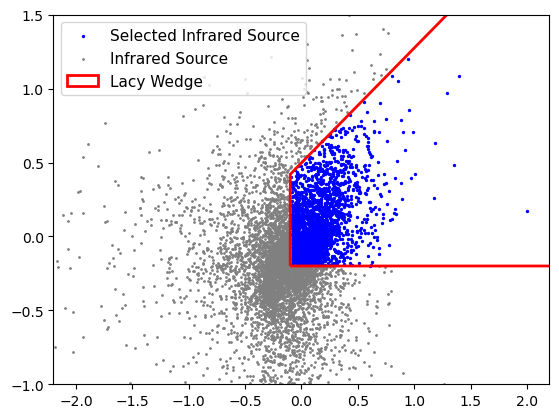

In [321]:
# First we will try to plot the lacey wedge.
#plt.scatter(np.log10(data['f_IRA1`C_58']/data['f_IRAC_36']), np.log10(data['f_IRAC_80']/data['f_IRAC_45']))
plt.xlim([-2.2, 2.2])
plt.ylim([-1, 1.5])


selection_condition = (np.log10(data['f_IRAC_58'] / data['f_IRAC_36']) > -0.1) & (np.log10(data['f_IRAC_80'] / data['f_IRAC_45']) > -0.2) & (np.log10(data['f_IRAC_80'] / data['f_IRAC_45']) < 0.8 * np.log10(data['f_IRAC_58'] / data['f_IRAC_36']) + 0.5)

# Apply selection criteria
selected_indices = np.where(selection_condition)
remaining_indices = np.where(~selection_condition)

print('Number of selected sources: {}'.format(len(selected_indices[0])))


# Selected data sources to be plotted in blue
selected_f_IRAC_58 = data['f_IRAC_58'][selected_indices]
selected_f_IRAC_36 = data['f_IRAC_36'][selected_indices]
selected_f_IRAC_80 = data['f_IRAC_80'][selected_indices]
selected_f_IRAC_45 = data['f_IRAC_45'][selected_indices]


# remaining data sources to be plotted in grey
remaining_f_IRAC_58 = data['f_IRAC_58'][remaining_indices]
remaining_f_IRAC_36 = data['f_IRAC_36'][remaining_indices]
remaining_f_IRAC_80 = data['f_IRAC_80'][remaining_indices]
remaining_f_IRAC_45 = data['f_IRAC_45'][remaining_indices]



# Create scatter plot for selected data
plt.scatter(np.log10(selected_f_IRAC_58 / selected_f_IRAC_36), np.log10(selected_f_IRAC_80 / selected_f_IRAC_45), c='blue', marker='o',s=2 ,label='Selected Infrared Source')

# Create scatter plot for remaining data
plt.scatter(np.log10(remaining_f_IRAC_58 / remaining_f_IRAC_36), np.log10(remaining_f_IRAC_80 / remaining_f_IRAC_45), c='grey', marker='o',s=1 ,label='Infrared Source')




# Define vertices for AGN wedge - This doesn't quite work. I need to figure out how to plot the wedge.
wedge_vertices = [
    (-0.1, -0.2),
    (0.8 * np.log10(selected_f_IRAC_58 / selected_f_IRAC_36).max() + 0.5, -0.2),
    (0.8 * np.log10(selected_f_IRAC_58 / selected_f_IRAC_36).max() + 0.5,0.8 * np.log10(selected_f_IRAC_58 / selected_f_IRAC_36).max() + 0.5),
    (-0.1, 0.8 * np.log10(selected_f_IRAC_58 / selected_f_IRAC_36).min() + 0.5),
    (-0.1, -0.2)
]

# Create a polygon patch for the AGN wedge
wedge_polygon = plt.Polygon(wedge_vertices, closed=True, edgecolor='r', facecolor='none', linestyle='-', linewidth=2, label='Lacy Wedge')



# Add the AGN wedge polygon patch to the plot
plt.gca().add_patch(wedge_polygon)

# Finally add the legend
plt.legend(loc='upper left', fontsize=11)

Now that have visualised the selected infrared sources, we can now use the selected sources to create a new column which has the value of 1 if the source is an agn and 0 if it is not. 
From the code above this corresponds to 1 if the data is in the selected dataset and 0 if it is in the remaining dataset.


In [322]:
# Turn into a pandas dataframe and compare against
df = pd.DataFrame(data)
df['Lacy AGN Diagnostic'] = 0 # Default value of 0 for all sources (this means they are not selected as agn)
df.loc[selected_indices[0], 'Lacy AGN Diagnostic'] = 1 # Set selected sources to 1 using boolean array selection

## Now we will use the modified dataset and using a different selection criteria we will aim to select a subset of the dataset that have the potential to be selected as AGN. For this case we will use the Messias KIM Selection ("Messias et al. 2012, 2013") 
as ZFOURGE only deals with redshifts below 4 we will only make use of redshifts below 4 and above 0.
this selection criteria deals with AB magnitudes instead of rest frame fluxes and is shown below.

This selection criteria behaves differently depending on we are considering a redshift below 1.8 or above 1.8
Noting that the selection criteria was taken from the paper by Messias et al. 2012


$z<1.8\begin{cases}K_{s}-[4.5]>0&\\ [4.5]-[8.0]>0&\end{cases} \\
z>1.8\begin{cases}[8.0]-[24]>-2.9\times ([4.5]-[8.0])+2.8&\\ [8.0]-[24]>0.5&\end{cases}$
 
as we are considering AB magnitudes we will need to convert the fluxes to magnitudes, this is done using the following formula:

$AB_f = 25 - 2.5 log_{10}(f)$

where f is the flux in microjansky


In [323]:
# We must convert the data to a rest frame fluxes to AB magnitudes


# ks flux is given in microjansky and is in the table as f_Ks
# We need to convert this to AB magnitudes

# create a function that converts to AB magnitudes according to Straatman et al. (2016) noting flux is given in microjansky
def flux_to_AB(flux):
    ab_f = 25 - 2.5*np.log10(flux)
    return ab_f


# we need to figure out how to get the redshifts for each of the sources
# We can use the EAZY Photmetric Redshift Catalogue to obtain redshifts for each of the sources
# we will also need to factor in the MIPS measurements in the 24um band so we must import the 
# herschel far infrared catalogue

eazy_data = np.genfromtxt('cdfs\cdfs.v1.6.9.zout', names=True, dtype=None, encoding='ascii')
her_data = np.genfromtxt('cdfs\cdfs.v1.6.9.herschel.v0.4.cat', names=True, dtype=None, encoding='ascii')

# Convert to pd dataframe
eazy_df = pd.DataFrame(eazy_data)
her_df = pd.DataFrame(her_data)







In [324]:
her_df['f24']

0        -0.033030
1       -99.000000
2       -99.000000
3        -0.000088
4       -99.000000
           ...    
30906     0.007753
30907     0.009758
30908     0.000580
30909     0.001168
30910    -0.009324
Name: f24, Length: 30911, dtype: float64

In [325]:
# Add photometric redshifts to dataframe from eazy_df based on id column
merged_df = pd.merge(df, eazy_df[['id', 'z_peak']], on='id')


# Add 24um fluxes to dataframe from her_df based on id column
merged_df = pd.merge(merged_df, her_df[['id', 'f24']], on='id')


In [326]:
merged_df # This contains the photometric redshifts for each of the sources
# While spectroscopic redshifts are better, z_peak can be used for inital data exploration

# We can now organise our data to be plotted depending on Messias KIM selection criteria
# remembering to apply rest frame fluxes to AB magnitudes function when plotting


# First for z < 1.8
merged_df_z1_8_less = merged_df[merged_df['z_peak'] < 1.8]
merged_df_z1_8_less = merged_df_z1_8_less[merged_df_z1_8_less['z_peak'] > 0.2]
merged_df_z1_8_less # This contains all of the sources with z < 1.8



,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec,Lacy AGN Diagnostic,z_peak,f24
4,5886,4903.505,2218.433,53.061234,-27.882744,3,182.0,3.092892,0.102656,1.072291,...,0.66,0,0,1,30.824230,1,1.101,0,1.1001,0.009380
5,5971,4657.758,2284.384,53.072819,-27.880001,2,663.0,39.013690,0.084678,1.051487,...,0.97,0,0,1,863.801000,1,1.097,0,1.0980,0.007272
6,5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.391652,0.086480,1.064606,...,0.93,0,0,1,152.140700,1,0.990,0,0.9668,0.128200
10,6151,4878.813,2251.459,53.062397,-27.881369,0,42.0,0.623881,0.092098,1.143291,...,0.82,0,0,1,9.627366,1,-99.000,0,0.3566,-0.008232
13,6179,4611.903,2274.999,53.074982,-27.880394,2,105.0,2.537197,0.088402,1.112323,...,0.89,0,0,1,55.978780,1,-99.000,0,1.0748,0.003676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,30800,3275.297,7608.458,53.137955,-27.658175,0,50.0,1.411908,0.202271,1.122429,...,0.17,0,0,1,9.488313,1,-99.000,1,1.0334,0.003078
7985,30807,2813.200,7518.599,53.159695,-27.661913,3,28.0,0.862770,0.170237,1.120601,...,0.24,0,0,1,5.752137,1,-99.000,1,1.1353,0.000881
7986,30810,2729.747,7432.337,53.163620,-27.665506,0,183.0,4.379274,0.138997,1.080345,...,0.36,0,0,1,40.619060,1,-99.000,0,1.4991,0.017080
7989,30873,3449.287,7466.832,53.129772,-27.664076,2,74.0,1.567462,0.177806,1.147671,...,0.22,0,0,1,14.595190,1,-99.000,1,1.7169,0.009148


In [327]:

merged_df_z1_8_less = merged_df_z1_8_less[merged_df_z1_8_less['f_Ks'] > 0] # reduce the dataset to only include sources with a Ks flux greater than 0
merged_df_z1_8_less = merged_df_z1_8_less[merged_df_z1_8_less['f24'] > 0]

In [328]:
merged_df_z1_8_less# This dataset should be relatively good to attempt to plot based on the conditions

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec,Lacy AGN Diagnostic,z_peak,f24
4,5886,4903.505,2218.433,53.061234,-27.882744,3,182.0,3.092892,0.102656,1.072291,...,0.66,0,0,1,30.824230,1,1.101,0,1.1001,0.009380
5,5971,4657.758,2284.384,53.072819,-27.880001,2,663.0,39.013690,0.084678,1.051487,...,0.97,0,0,1,863.801000,1,1.097,0,1.0980,0.007272
6,5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.391652,0.086480,1.064606,...,0.93,0,0,1,152.140700,1,0.990,0,0.9668,0.128200
13,6179,4611.903,2274.999,53.074982,-27.880394,2,105.0,2.537197,0.088402,1.112323,...,0.89,0,0,1,55.978780,1,-99.000,0,1.0748,0.003676
16,6243,4733.049,2313.902,53.069271,-27.878771,2,351.0,10.619380,0.079158,1.058206,...,1.11,0,0,1,190.587400,1,1.046,0,1.0372,0.104900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,30800,3275.297,7608.458,53.137955,-27.658175,0,50.0,1.411908,0.202271,1.122429,...,0.17,0,0,1,9.488313,1,-99.000,1,1.0334,0.003078
7985,30807,2813.200,7518.599,53.159695,-27.661913,3,28.0,0.862770,0.170237,1.120601,...,0.24,0,0,1,5.752137,1,-99.000,1,1.1353,0.000881
7986,30810,2729.747,7432.337,53.163620,-27.665506,0,183.0,4.379274,0.138997,1.080345,...,0.36,0,0,1,40.619060,1,-99.000,0,1.4991,0.017080
7989,30873,3449.287,7466.832,53.129772,-27.664076,2,74.0,1.567462,0.177806,1.147671,...,0.22,0,0,1,14.595190,1,-99.000,1,1.7169,0.009148


In [329]:
# Create new columns that convert the flux in Microjank to AB magnitudes
merged_df_z1_8_less['f_IRAC_45_AB'] = merged_df_z1_8_less['f_IRAC_45'].apply(flux_to_AB)
merged_df_z1_8_less['f_IRAC_80_AB'] = merged_df_z1_8_less['f_IRAC_80'].apply(flux_to_AB)
merged_df_z1_8_less['f24_AB'] = merged_df_z1_8_less['f24'].apply(flux_to_AB)
merged_df_z1_8_less['f_Ks_AB'] = merged_df_z1_8_less['f_Ks'].apply(flux_to_AB)

(-2.0, 2.0)

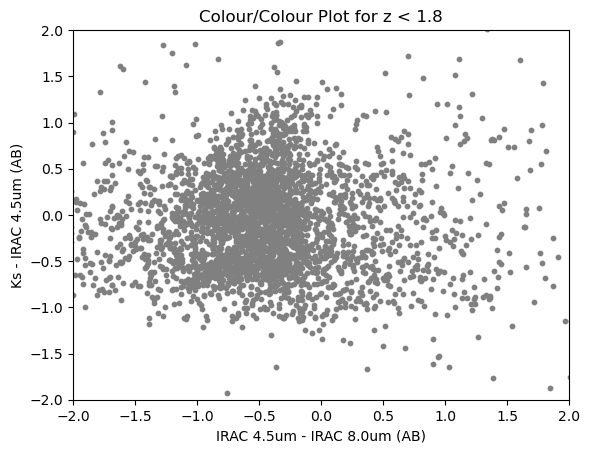

In [330]:
# Now that we have the AB magnitudes we can plot the data based on the criteria, we will need a selection criteria to determine
# what will be plotted in the blue, and the inverse of that will be plotted in grey

# Noting that the y axis is Ks_AB - IRAC_45_AB and the x axis isIRAC_45_AB - IRAC_80_A


# First plot without selection criteria
plt.scatter(merged_df_z1_8_less['f_IRAC_45_AB'] - merged_df_z1_8_less['f_IRAC_80_AB'], merged_df_z1_8_less['f_Ks_AB'] - merged_df_z1_8_less['f_IRAC_45_AB'], s=10, color='grey', label='Infrared Source')
plt.title("Colour/Colour Plot for z < 1.8")
plt.xlabel("IRAC 4.5um - IRAC 8.0um (AB)")
plt.ylabel("Ks - IRAC 4.5um (AB)")

# We can adjust these limits latter
plt.xlim([-2, 2])
plt.ylim([-2, 2])


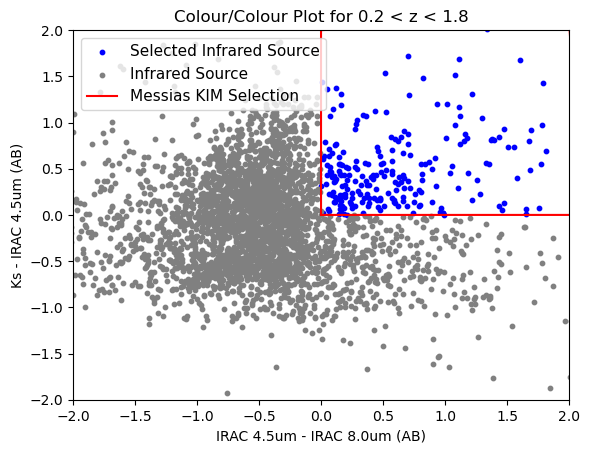

In [331]:
# Now we can attempt to use the selection criteria to determine the AGN wedge
selection_condition = (merged_df_z1_8_less['f_IRAC_45_AB'] - merged_df_z1_8_less['f_IRAC_80_AB'] > 0) & (merged_df_z1_8_less['f_Ks_AB'] - merged_df_z1_8_less['f_IRAC_45_AB'] > 0)
kim_selection_indices_less = np.where(selection_condition)



# We can use the selected indicies to get the data for the selected sources 
selected_f_IRAC_45_AB = merged_df_z1_8_less['f_IRAC_45_AB'][selection_condition]
selected_f_IRAC_80_AB = merged_df_z1_8_less['f_IRAC_80_AB'][selection_condition]
selected_f_IRAC_Ks_AB = merged_df_z1_8_less['f_Ks_AB'][selection_condition]

# We can use the selected indicies to get the data for the selected sources 
remaining_f_IRAC_45_AB = merged_df_z1_8_less['f_IRAC_45_AB'][~selection_condition]
remaining_f_IRAC_80_AB = merged_df_z1_8_less['f_IRAC_80_AB'][~selection_condition]
remaining_f_IRAC_Ks_AB = merged_df_z1_8_less['f_Ks_AB'][~selection_condition]



# Now attempt to plot the selected sources in blue and the remaining sources in grey
plt.scatter(selected_f_IRAC_45_AB - selected_f_IRAC_80_AB, selected_f_IRAC_Ks_AB - selected_f_IRAC_45_AB, s=10, color='blue', label='Selected Infrared Source')
plt.scatter(remaining_f_IRAC_45_AB - remaining_f_IRAC_80_AB, remaining_f_IRAC_Ks_AB - remaining_f_IRAC_45_AB, s=10, color='grey', label='Infrared Source')
plt.title("Colour/Colour Plot for 0.2 < z < 1.8")
plt.xlabel("IRAC 4.5um - IRAC 8.0um (AB)")
plt.ylabel("Ks - IRAC 4.5um (AB)")

# We can adjust these limits latter
plt.xlim([-2, 2])
plt.ylim([-2, 2])


plt.plot([0, 0,2, 2.1, 0],[0,2, 2.1, 0, 0], 'r-', label='Messias KIM Selection') 

# Finally add the legend
plt.legend(loc='upper left', fontsize=11)

In [332]:
# We now need to again asign a diagnostic value to each of the sources based on the selection criteria
df['Messias KIM AGN Diagnostic'] = 0 # Default value of 0 for all sources (this means they are not selected as agn
df.loc[kim_selection_indices_less[0], 'Messias KIM AGN Diagnostic'] = 1 # Set this to 1 to shown that they are selected as agn
df[df['Messias KIM AGN Diagnostic'] == 1] # This shows all of the sources that are selected as agn based on the Messias KIM selection criteria


,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_irac,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec,Lacy AGN Diagnostic,Messias KIM AGN Diagnostic
5,5971,4657.758,2284.384,53.072819,-27.880001,2,663.0,39.013690,0.084678,1.051487,...,42191.0,0.97,0,0,1,863.801000,1,1.097,0,1
29,6398,4935.858,2338.888,53.059711,-27.877726,2,301.0,5.946328,0.092098,1.057438,...,31524.0,0.82,0,0,1,86.605830,1,-99.000,0,1
35,6459,4878.473,2310.248,53.062416,-27.878920,0,29.0,0.503490,0.084678,1.153505,...,34276.0,0.97,0,0,1,11.519060,1,-99.000,0,1
37,6476,4418.791,2348.962,53.084084,-27.877314,3,223.0,5.276847,0.081779,1.073184,...,44214.0,1.04,0,0,1,101.238300,1,-99.000,0,1
38,6477,4659.158,2372.922,53.072754,-27.876312,3,568.0,34.079940,0.075817,1.057117,...,43543.0,1.21,0,0,1,841.189700,1,1.101,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,18019,2577.726,4608.908,53.170826,-27.783148,0,16.0,0.267900,0.056227,1.298938,...,146400.0,2.20,0,0,1,9.992288,1,-99.000,1,1
3518,18050,3513.817,4623.031,53.126739,-27.782566,0,48.0,1.219695,0.051231,1.177255,...,145450.0,2.65,0,0,1,53.664740,1,-99.000,0,1
3540,18106,3447.674,4630.588,53.129852,-27.782251,2,48.0,1.110592,0.051135,1.159805,...,144430.0,2.66,0,0,1,45.087310,1,-99.000,0,1
3541,18109,3728.770,4743.442,53.116615,-27.777550,2,1675.0,209.783600,0.052432,1.035358,...,127060.0,2.53,0,0,1,6661.639000,1,0.247,0,1


In [333]:
# Now that we have applied the selection criteria for z < 1.8 we can attempt to do the same for z > 1.8
# First for z < 1.8
merged_df_z1_8_greater = merged_df[merged_df['z_peak'] > 1.8]
merged_df_z1_8_greater = merged_df_z1_8_greater[merged_df_z1_8_greater['z_peak'] < 3.2]
merged_df_z1_8_greater # This contains all of the sources with z < 1.8
merged_df_z1_8_greater = merged_df_z1_8_greater[merged_df_z1_8_greater['f_Ks'] > 0] # reduce the dataset to only include sources with a Ks flux greater than 0
merged_df_z1_8_greater = merged_df_z1_8_greater[merged_df_z1_8_greater['f24'] > 0] 

merged_df_z1_8_greater# This dataset should be relatively good to attempt to plot based on the conditions

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec,Lacy AGN Diagnostic,z_peak,f24
0,5746,4778.412,2191.809,53.067131,-27.883856,2,362.0,2.698493,0.095665,1.031906,...,0.76,0,0,1,16.611140,1,2.808,1,2.9412,0.086420
1,5860,4916.620,2228.198,53.060615,-27.882338,3,247.0,8.315286,0.102656,1.075718,...,0.66,0,0,1,145.271100,1,-99.000,1,2.2177,0.211200
2,5864,4866.185,2207.664,53.062992,-27.883194,3,187.0,9.188897,0.098286,1.101090,...,0.72,0,0,1,181.304200,1,-99.000,0,1.8083,0.012090
3,5880,4918.070,2205.127,53.060547,-27.883299,3,134.0,3.127875,0.107667,1.095818,...,0.60,0,0,1,46.083340,1,-99.000,1,1.8316,0.048270
7,6020,4722.533,2272.799,53.069767,-27.880484,3,341.0,7.114190,0.083399,1.050610,...,1.00,0,0,1,153.704900,1,-99.000,1,2.5007,0.010810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,30719,2983.129,7622.702,53.151699,-27.657577,3,41.0,0.908461,0.196572,1.227160,...,0.18,0,0,1,6.559596,1,-99.000,1,3.1890,0.002103
7974,30724,3584.657,7482.463,53.123402,-27.663424,0,25.0,0.674413,0.181990,1.377135,...,0.21,0,0,1,9.006686,1,-99.000,1,1.8033,0.029550
7976,30731,3186.519,7592.250,53.142132,-27.658848,0,57.0,1.558941,0.202271,1.181954,...,0.17,0,0,1,12.022270,1,-99.000,0,1.9480,0.000657
7979,30759,2733.369,7625.498,53.163448,-27.657459,0,58.0,1.456440,0.208496,1.188476,...,0.16,0,0,1,9.966480,1,-99.000,0,2.0401,0.022680


In [334]:
def flux_to_AB(flux):
    ab_f = 25 - 2.5*np.log10(flux)
    return ab_f


# Convert flux from milliJansky to microJansky
merged_df_z1_8_greater['f24'] = merged_df_z1_8_greater['f24']*1000

# Create new columns that convert the flux in Microjank to AB magnitudes
merged_df_z1_8_greater['f_IRAC_45_AB'] = merged_df_z1_8_greater['f_IRAC_45'].apply(flux_to_AB)
merged_df_z1_8_greater['f_IRAC_80_AB'] = merged_df_z1_8_greater['f_IRAC_80'].apply(flux_to_AB)
merged_df_z1_8_greater['f24_AB'] = merged_df_z1_8_greater['f24'].apply(flux_to_AB)
merged_df_z1_8_greater['f_Ks_AB'] = merged_df_z1_8_greater['f_Ks'].apply(flux_to_AB)



In [335]:
print(merged_df_z1_8_greater['f24_AB'])


0       20.158464
1       19.188265
2       22.293934
3       20.790807
7       22.415436
          ...    
7973    24.192902
7974    21.323606
7976    25.456087
7979    21.610892
7982    17.972236
Name: f24_AB, Length: 1553, dtype: float64


(-5.0, 5.0)

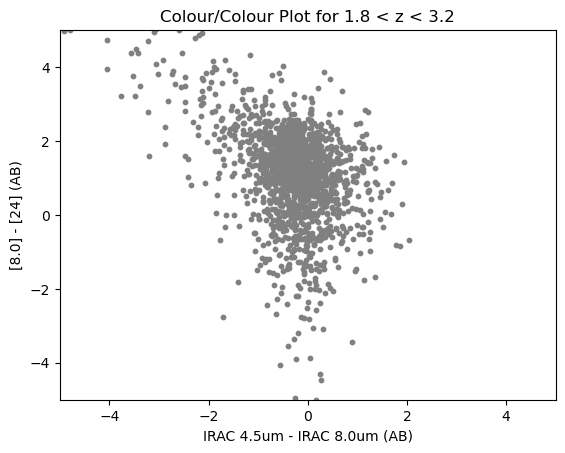

In [336]:
# We can plot the dataset without the selection criteria
# First plot without selection criteria
plt.scatter((merged_df_z1_8_greater['f_IRAC_45_AB'] - merged_df_z1_8_greater['f_IRAC_80_AB']), (merged_df_z1_8_greater['f_IRAC_80_AB'] - merged_df_z1_8_greater['f24_AB']), s=10, color='grey', label='Infrared Source')
plt.title("Colour/Colour Plot for 1.8 < z < 3.2")
plt.xlabel("IRAC 4.5um - IRAC 8.0um (AB)")
plt.ylabel("[8.0] - [24] (AB)")

# We can adjust these limits latter
plt.xlim([-5, 5])
plt.ylim([-5, 5])



# I think the reason that this isn't working is that f_24 is orinally in millijanksys and not microjanksys so it needs to be converted first
# before we can attempt to plot it. We can do this by dividing the f_24 column by 1000 and then applying the flux_to_AB function


In [337]:
# Now we can attempt to use the selection criteria to determine the AGN wedge
#selection_condition = (((merged_df_z1_8_greater['f_IRAC_80_AB'] - merged_df_z1_8_greater['f24_AB']) > (2.9 * (merged_df_z1_8_greater['f_IRAC_45_AB'] - merged_df_z1_8_greater['f_IRAC_80_AB']) + 2.8)) & (merged_df_z1_8_greater['f_IRAC_80_AB'] - merged_df_z1_8_greater['f24_AB'] > 0.5))

selection_condition_1 = (merged_df_z1_8_greater['f_IRAC_80_AB'] - merged_df_z1_8_greater['f24_AB'] > ((-2.9 * (merged_df_z1_8_greater['f_IRAC_45_AB'] - merged_df_z1_8_greater['f_IRAC_80_AB'])) + 2.8))
selection_condition_2 = ((merged_df_z1_8_greater['f_IRAC_80_AB'] - merged_df_z1_8_greater['f24_AB']) > 0.5)
selection_condition = selection_condition_1 & selection_condition_2
print(selection_condition)


kim_selection_indices_greater = np.where(selection_condition)
print(len(kim_selection_indices_greater[0]))



# We can use the selected indicies to get the data for the selected sources 
selected_f_IRAC_45_AB = merged_df_z1_8_greater['f_IRAC_45_AB'][selection_condition]
selected_f_IRAC_80_AB = merged_df_z1_8_greater['f_IRAC_80_AB'][selection_condition]
#selected_f_IRAC_Ks_AB = merged_df_z1_8_greater['f_Ks_AB'][selection_condition]
selected_f_24 = merged_df_z1_8_greater['f24_AB'][selection_condition]

# We can use the selected indicies to get the data for the selected sources 
remaining_f_IRAC_45_AB = merged_df_z1_8_greater['f_IRAC_45_AB'][~selection_condition]
remaining_f_IRAC_80_AB = merged_df_z1_8_greater['f_IRAC_80_AB'][~selection_condition]
#remaining_f_IRAC_Ks_AB = merged_df_z1_8_greater['f_Ks_AB'][~selection_condition]
remaining_f_24 = merged_df_z1_8_greater['f24_AB'][~selection_condition]



0       False
1       False
2       False
3       False
7       False
        ...  
7973    False
7974     True
7976    False
7979    False
7982    False
Length: 1553, dtype: bool
124


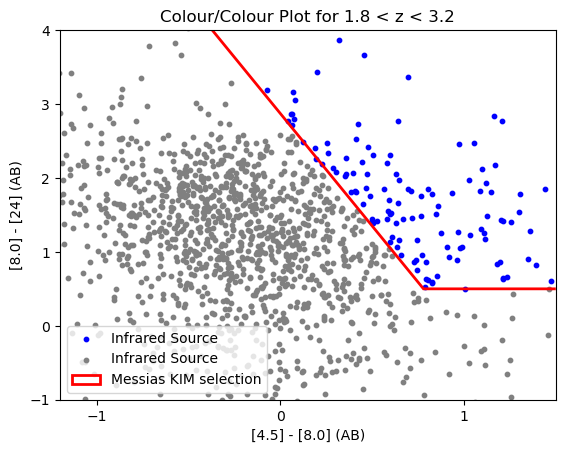

In [338]:
# We can plot the dataset without the selection criteria
# First plot without selection criteria
plt.scatter((selected_f_IRAC_45_AB - selected_f_IRAC_80_AB), (selected_f_IRAC_80_AB - selected_f_24), s=10, color='blue', label='Infrared Source')
plt.scatter((remaining_f_IRAC_45_AB - remaining_f_IRAC_80_AB), (remaining_f_IRAC_80_AB - remaining_f_24), s=10, color='grey', label='Infrared Source')

plt.title("Colour/Colour Plot for 1.8 < z < 3.2")
plt.xlabel("[4.5] - [8.0] (AB)")
plt.ylabel("[8.0] - [24] (AB)")

# We can adjust these limits latter
plt.xlim([-1.2, 1.5])
plt.ylim([-1, 4])
plt.xticks([-1, 0, 1])

# Mathematically redefine this latter rather than doing from inspection
wedge_vertices = [
    (1.5, 0.5),
    (0.78,0.5),
    (-0.37,4)
]

# Create a polygon patch for the AGN wedge
wedge_polygon = plt.Polygon(wedge_vertices, closed=False, edgecolor='r', facecolor='none', linestyle='-', linewidth=2, label='Messias KIM selection')



# Add the AGN wedge polygon patch to the plot
plt.gca().add_patch(wedge_polygon)

# Finally add the legend
plt.legend(loc='lower left')
plt.show()

In [339]:
# Make use of the error to plot the data and really narrow down the entire dataset that we are plotting,
# photoredshift is fine as it is calculated using the easy catalogue
# make this script general and compiple all fields into one big dataframe and then do that selection based on the big dataset.
## Essentially we want a really general approach across all fields, we can probably compile everything into a simple pd dataframe and 
## do all of out making the data work from then one. 
# We now need to again asign a diagnostic value to each of the sources based on the selection criteria
#df['Messias KIM AGN Diagnostic'] = 0 # Default value of 0 for all sources (this means they are not selected as agn
df.loc[kim_selection_indices_greater[0], 'Messias KIM AGN Diagnostic'] = 1 # Set this to 1 to shown that they are selected as agn
df[df['Messias KIM AGN Diagnostic'] == 1] # This shows all of the sources that are selected as agn based on the Messias KIM selection criteria.

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_irac,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec,Lacy AGN Diagnostic,Messias KIM AGN Diagnostic
5,5971,4657.758,2284.384,53.072819,-27.880001,2,663.0,39.013690,0.084678,1.051487,...,42191.0,0.97,0,0,1,863.801000,1,1.097,0,1
23,6323,4773.433,2328.669,53.067368,-27.878155,2,279.0,17.318140,0.077434,1.079404,...,38762.0,1.16,0,0,1,387.997000,1,-99.000,0,1
25,6344,4816.196,2317.614,53.065353,-27.878614,3,148.0,5.251283,0.079158,1.090322,...,36737.0,1.11,0,0,1,88.217260,1,-99.000,1,1
28,6390,4447.659,2308.954,53.082726,-27.878981,0,68.0,1.319632,0.088402,1.138051,...,45692.0,0.89,0,0,1,27.995380,1,-99.000,0,1
29,6398,4935.858,2338.888,53.059711,-27.877726,2,301.0,5.946328,0.092098,1.057438,...,31524.0,0.82,0,0,1,86.605830,1,-99.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,18019,2577.726,4608.908,53.170826,-27.783148,0,16.0,0.267900,0.056227,1.298938,...,146400.0,2.20,0,0,1,9.992288,1,-99.000,1,1
3518,18050,3513.817,4623.031,53.126739,-27.782566,0,48.0,1.219695,0.051231,1.177255,...,145450.0,2.65,0,0,1,53.664740,1,-99.000,0,1
3540,18106,3447.674,4630.588,53.129852,-27.782251,2,48.0,1.110592,0.051135,1.159805,...,144430.0,2.66,0,0,1,45.087310,1,-99.000,0,1
3541,18109,3728.770,4743.442,53.116615,-27.777550,2,1675.0,209.783600,0.052432,1.035358,...,127060.0,2.53,0,0,1,6661.639000,1,0.247,0,1


# Redo Script
This script roughly does everything required for the first activity in the project. From here the script needs to be refactored and tidied up, using one methof of data manipulation. I.e create an dataframe that will be used in the start of the script containing most of the information required for the project., i.e
* Lacy Wedge
* Messias KIM selection
* Photometric Redshifts

Filter this data acoordingly.